In [1]:
import numpy as np
import pandas as pd
from surprise import Reader, Dataset
from surprise import SVD
import surprise
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset_movie_100k.csv')[['user_id','book_id','rating']]
reader = Reader()
data = Dataset.load_from_df(data, reader)

Evaluating MSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
MSE (testset)     0.8819  0.8722  0.8877  0.8806  0.0064  
Fit time          0.19    0.26    0.21    0.22    0.03    
Test time         0.55    0.58    0.74    0.62    0.08    
Evaluating MSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
MSE (testset)     0.8475  0.8398  0.8553  0.8475  0.0063  
Fit time          0.51    0.39    0.44    0.45    0.05    
Test time         0.64    0.55    0.51    0.57    0.06    
Evaluating MSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
MSE (testset)     0.8245  0.8362  0.8344  0.8317  0.0051  
Fit time          0.50    0.50    0.57    0.52    0.03    
Test time         0.56    0.62    0.56    0.58    0.03    
Evaluating MSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
MSE (testset)     0.8281  0.8134  0.8240 

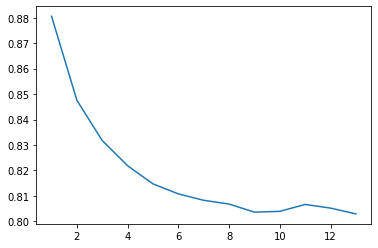

In [4]:
perte=[]
for n in range(1,14):
    algo = SVD(n_factors=8, n_epochs=n,lr_all=.01, reg_all=0.01)
    results = surprise.model_selection.validation.cross_validate(algo, data, measures=['MSE'], cv=3, verbose=True)
    mse=results['test_mse'].mean()
    perte.append(mse)
plt.plot(range(1,14),perte)
plt.show()

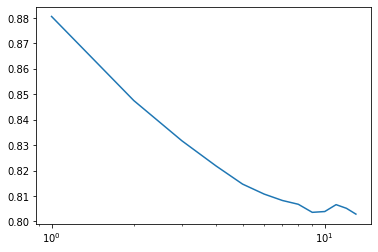

In [6]:
plt.plot(range(1,14),perte)
plt.xscale("log")
plt.show()